# Decision Tree.

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Посмотрим на датасет.

In [4]:
df = pd.read_csv("Data/BikeSharingDemand/train.csv")

In [5]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
df.shape

(10886, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [8]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [9]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [10]:
df['datetime'].dt.year.value_counts()

2012    5464
2011    5422
Name: datetime, dtype: int64

В данных фигурируют 2011 и 2012 год.

In [11]:
df['hour'] = df['datetime'].dt.hour

In [12]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [13]:
df[df['season'] == 1]['count'].median(), df[df['season'] == 2]['count'].median(), \
df[df['season'] == 3]['count'].median(), df[df['season'] == 4]['count'].median()

(78.0, 172.0, 195.0, 161.0)

Выше мы видим медианное значение аренды великов в разные сезоны.

### Избавляемся от ненужных фичей.

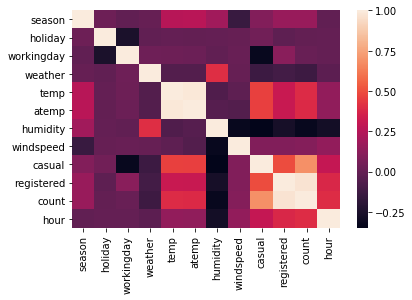

In [14]:
sns.heatmap(df.corr());

Заметим что **`casual`** и **`registered`** составляют наш целевой признак, а так же **`temp`** и **`atemp`** сильно коррелируют друг с другом (еще бы). Избавляемся от них, а так же от влажности.

In [15]:
df.drop(['casual', 'registered', 'datetime', 'temp',\
         'humidity'], axis=1, inplace=True)

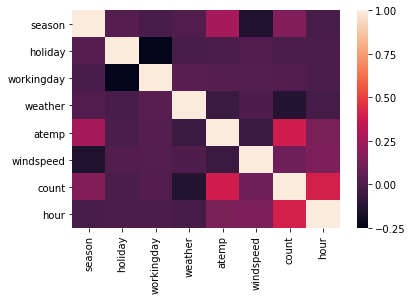

In [16]:
sns.heatmap(df.corr());

Так то лучше.

### Смотрим на данные.

In [17]:
df[(df['holiday'] == 0) & (df['workingday'] == 0)].head()

,season,holiday,workingday,weather,atemp,windspeed,count,hour
0,1,0,0,1,14.395,0.0,16,0
1,1,0,0,1,13.635,0.0,40,1
2,1,0,0,1,13.635,0.0,32,2
3,1,0,0,1,14.395,0.0,13,3
4,1,0,0,1,14.395,0.0,1,4


Разве **`holiday`** и **`workingday`** не взаимоисключающие фичи? О_о

Идем дальше!

In [18]:
df.sort_values(by='count', ascending=False).head(15)
# ascending - по возрастанию

,season,holiday,workingday,weather,atemp,windspeed,count,hour
9345,3,0,1,1,31.060,16.9979,977,18
9320,3,0,1,1,31.820,0.0000,970,17
9297,3,0,1,1,31.060,19.9995,968,18
9752,4,0,1,1,27.275,15.0013,948,17
9896,4,0,1,1,25.000,12.9980,943,17
9344,3,0,1,1,31.820,19.9995,925,17
9584,4,0,1,1,32.575,0.0000,917,17
9608,4,0,1,1,32.575,15.0013,901,17
9632,4,0,1,1,31.820,11.0014,900,17
8984,3,0,1,1,36.365,12.9980,897,17


Видно что чаще всего люди арендовали велики после работы (если же отсчет вёлся с 0:00 am).

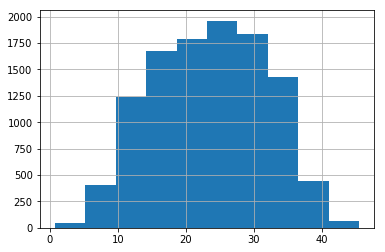

In [19]:
df['atemp'].hist();

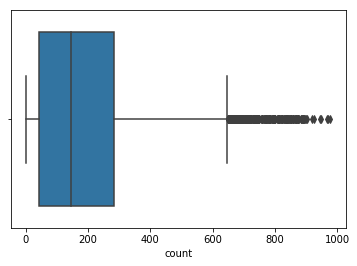

In [20]:
sns.boxplot(df['count']);

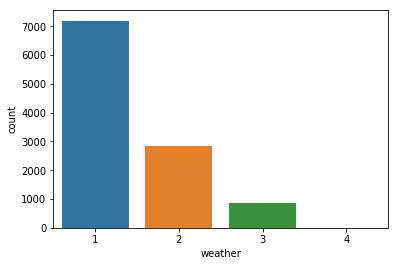

In [21]:
sns.countplot(df['weather']);

В ясную, малооблачную погоду люди охотнее пользовались арендой.

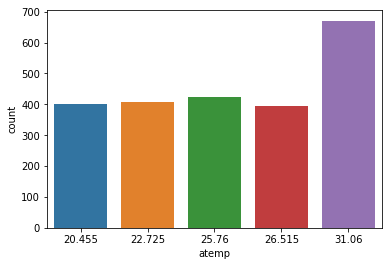

In [22]:
sns.countplot(df[df['atemp'].isin(df['atemp'].value_counts().head().index)]['atemp']);

Выше видим 5 'самых популярных' температур.  

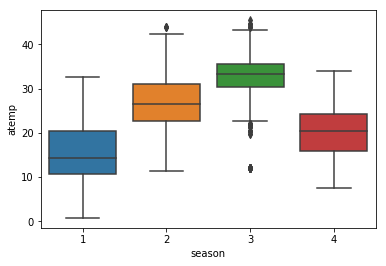

In [23]:
sns.boxplot(x='season', y='atemp', data=df);

А осень - самое теплое время года.

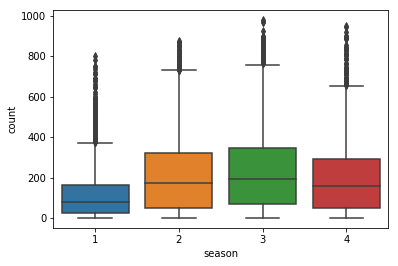

In [24]:
sns.boxplot(x='season', y='count', data=df);

Соответственно, в теплую погоду люди охотнее арендовали велики.

In [25]:
pd.crosstab(df['season'], df['weather'])

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


Видим, что был единичный случай плохой погоды.

## Построение модели.


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()
scaler.fit(df['hour'].values.reshape(-1, 1))
df['hour_scaled'] = scaler.transform(df['hour'].values.reshape(-1, 1))

D:\Users\Ivan\Documents\Python\Anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Users\Ivan\Documents\Python\Anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [29]:
df.head()

,season,holiday,workingday,weather,atemp,windspeed,count,hour,hour_scaled
0,1,0,0,1,14.395,0.0,16,0,-1.668944
1,1,0,0,1,13.635,0.0,40,1,-1.524341
2,1,0,0,1,13.635,0.0,32,2,-1.379739
3,1,0,0,1,14.395,0.0,13,3,-1.235137
4,1,0,0,1,14.395,0.0,1,4,-1.090534


In [30]:
df.drop(['hour'], axis=1, inplace=True)

In [31]:
df.head()

,season,holiday,workingday,weather,atemp,windspeed,count,hour_scaled
0,1,0,0,1,14.395,0.0,16,-1.668944
1,1,0,0,1,13.635,0.0,40,-1.524341
2,1,0,0,1,13.635,0.0,32,-1.379739
3,1,0,0,1,14.395,0.0,13,-1.235137
4,1,0,0,1,14.395,0.0,1,-1.090534


In [32]:
y = df['count']
x = df.drop(['count'], axis=1)

In [33]:
x_train, x_val, y_train, y_val = \
train_test_split(x.values, y.values, test_size=0.2, random_state=50)

In [34]:
tree = DecisionTreeRegressor(max_depth=5, random_state=50)

In [35]:
tree.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=50, splitter='best')

In [36]:
np.mean(cross_val_score(tree, x_train, y_train, cv=10))

0.6004286986441023

In [37]:
r2_score(y_val, tree.predict(x_val))

0.5858667130057134

In [38]:
mean_squared_error(y_val, tree.predict(x_val))

13492.376885124297

## Тюним гиперпараметры.

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
tree_params = {'max_depth': np.arange(1,10),
               'max_features': np.arange(1,6)
              }

In [41]:
tree_grid = GridSearchCV(tree, tree_params)

In [42]:
%%time
tree_grid.fit(x_train, y_train)

Wall time: 502 ms


GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=50, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'max_features': array([1, 2, 3, 4, 5])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [43]:
tree_grid.best_params_

{'max_depth': 9, 'max_features': 5}

In [44]:
tree_grid.best_score_

0.7398325381736988

In [45]:
r2_score(y_val, tree_grid.predict(x_val))

0.7400563413867656

In [46]:
np.sqrt(mean_squared_error(y_val, tree_grid.predict(x_val)))

92.02668452617586

## Попробуем избавиться от выбросов.

In [47]:
y = df['count'].apply(lambda x: x if x<=620 else df['count'].median())
x = df.drop('count', axis=1)

In [48]:
x_train_1, x_val_1, y_train_1, y_val_1 = \
train_test_split(x.values, y, test_size=0.2, random_state=50)

In [49]:
tree_1 = DecisionTreeRegressor(max_depth=5, random_state=50)

In [50]:
tree_1.fit(x_train_1, y_train_1)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=50, splitter='best')

In [51]:
np.mean(cross_val_score(tree_1, x_train, y_train, cv=10))

0.6004286986441023

In [52]:
r2_score(y_val, tree_1.predict(x_val))

0.5298555085923631

In [53]:
np.sqrt(mean_squared_error(y_val, tree_1.predict(x_val)))

123.76271791974135

Протюним это.

In [54]:
tree_grid_1 = GridSearchCV(tree_1, tree_params)

In [55]:
%%time
tree_grid_1.fit(x_train_1, y_train_1)

Wall time: 514 ms


GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=50, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'max_features': array([1, 2, 3, 4, 5])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [56]:
tree_grid_1.best_params_

{'max_depth': 9, 'max_features': 5}

In [57]:
tree_grid_1.best_score_

0.6491967840072139

In [58]:
r2_score(y_val, tree_grid_1.predict(x_val))

0.5975473044519468

In [59]:
mean_squared_error(y_val, tree_grid_1.predict(x_val))

13111.825630291418

Как мы видим, best_score_ у дерева, где выбросы были заменены медианой, только ухудшился. В целом, понятно почему.

Получилось как то так.

## Взглянем на построенные деревья.

In [60]:
from sklearn.tree import export_graphviz

In [61]:
export_graphviz(tree, out_file='img/tree.dot', \
               feature_names=x.columns, filled=True)

In [62]:
!dot -Tpng img/tree.dot -o img/tree.png

<img src='img/tree.png'>

# Regressor

In [63]:
df = pd.read_csv("Data/BikeSharingDemand/train.csv")

In [64]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['hour'] = df['datetime'].dt.hour
df['dayofweek'] = df.datetime.dt.dayofweek
df['day'] = df.datetime.dt.day
df['month'] = df.datetime.dt.month
df['year'] = df.datetime.dt.year

In [65]:
df.drop(['datetime', 'casual', 'registered', 'temp',
         'humidity'], axis=1, inplace=True);

In [66]:
df.head()

,season,holiday,workingday,weather,atemp,windspeed,count,hour,dayofweek,day,month,year
0,1,0,0,1,14.395,0.0,16,0,5,1,1,2011
1,1,0,0,1,13.635,0.0,40,1,5,1,1,2011
2,1,0,0,1,13.635,0.0,32,2,5,1,1,2011
3,1,0,0,1,14.395,0.0,13,3,5,1,1,2011
4,1,0,0,1,14.395,0.0,1,4,5,1,1,2011


In [67]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder

In [68]:
linreg = LinearRegression()
lasso = Lasso(random_state=30)
ridge = Ridge(random_state=30)
lasso_cv = LassoCV(random_state=30, cv=15, n_jobs=-1)
ridge_cv = RidgeCV(cv=15)
forest = RandomForestRegressor()


scaler = StandardScaler()
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [69]:
x, y = df.drop('count', axis=1), df['count']

In [70]:
x_train, x_valid, y_train, y_valid = \
train_test_split(x.values, y.values, test_size=0.2, random_state=50)

In [132]:
models_name = ['linreg', 'lasso', 'lasso_cv', 'ridge', 'ridge_cv', 'forest']
models = [linreg, lasso, lasso_cv, ridge, ridge_cv, forest]

In [74]:
mse = []
for model in models:
    model.fit(x_train, y_train)
    mse.append(mean_squared_error(y_valid,
                                  model.predict(x_valid)))
    
pd.DataFrame(np.array([[mse], [np.sqrt(mse)]]).reshape(2, 6),
             index = ['mse', 'sqrt'], columns = models_name)

,linreg,lasso,lasso_cv,ridge,ridge_cv,forest
mse,21083.711994,21102.963201,21094.645818,21083.667983,21083.371650,2180.047401
sqrt,145.202314,145.268590,145.239959,145.202162,145.201142,46.690978


# O-H-E

In [101]:
data = df
data.head()

,season,holiday,workingday,weather,atemp,windspeed,count,hour,dayofweek,day,month,year
0,1,0,0,1,14.395,0.0,16,0,5,1,1,2011
1,1,0,0,1,13.635,0.0,40,1,5,1,1,2011
2,1,0,0,1,13.635,0.0,32,2,5,1,1,2011
3,1,0,0,1,14.395,0.0,13,3,5,1,1,2011
4,1,0,0,1,14.395,0.0,1,4,5,1,1,2011


In [102]:
cat_f = ['weather', 'season', 'holiday', 'workingday', 'hour', 
          'dayofweek', 'day', 'year', 'month']
x, y = data.drop('count', axis=1), data['count']

In [103]:
enc.fit(x[cat_f])
x = pd.concat([x.drop(cat_f, axis=1),
               pd.DataFrame(enc.transform(x[cat_f]))], axis=1).reindex()

In [104]:
x.head()

,atemp,windspeed,0,1,2,3,4,5,6,7,...,66,67,68,69,70,71,72,73,74,75
0,14.395,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,13.635,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,13.635,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,14.395,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,14.395,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
x.shape

(10886, 78)

In [106]:
quant = ['atemp', 'windspeed']

In [1]:
s = scaler.fit_transform(x[quant])
x = pd.concat([x.drop(quant, axis=1),
               pd.DataFrame(scaler.transform(x[quant]),
                            columns = quant)], axis=1).reindex()
x.head()

NameError: name 'scaler' is not defined

In [108]:
x.shape

(10886, 78)

In [109]:
data.shape

(10886, 12)

In [110]:
x_train, x_valid, y_train, y_valid = \
train_test_split(x.values, y.values, test_size=0.2, random_state=50)

In [111]:
mse = []
for model in models:
    model.fit(x_train, y_train)
    mse.append(mean_squared_error(y_valid,
                                  model.predict(x_valid)))

In [133]:
pd.DataFrame(np.array([[mse], [np.sqrt(mse)]]).reshape(2, 6),
             ['mse', 'sqrt'], columns = models_name)

,linreg,lasso,lasso_cv,ridge,ridge_cv,forest
mse,10740.642928,11264.550220,10683.195914,10690.352221,10690.352221,2698.969697
sqrt,103.637073,106.134585,103.359547,103.394160,103.394160,51.951609


In [93]:
trees = RandomForestRegressor()

In [94]:
param_grid = { 
            "n_estimators"      : range(100, 501, 100),
            "max_features"      : ["auto", "sqrt"],
            }
grid = GridSearchCV(trees, param_grid, n_jobs=-1, cv=5)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': range(100, 501, 100), 'max_features': ['auto', 'sqrt']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [95]:
grid.best_params_

{'max_features': 'auto', 'n_estimators': 400}

In [135]:
mean_squared_error(y_valid, grid.predict(x_valid)), \
np.sqrt(mean_squared_error(y_valid, grid.predict(x_valid)))

(2503.8315203799357, 50.038300534489935)

In [134]:
models_name.append('tuned_forest')
mse.append(mean_squared_error(y_valid, grid.predict(x_valid)))
pd.DataFrame(np.array([[mse], [np.sqrt(mse)]]).reshape(2, 7),
             ['mse', 'sqrt'], columns = models_name)

,linreg,lasso,lasso_cv,ridge,ridge_cv,forest,tuned_forest
mse,10740.642928,11264.550220,10683.195914,10690.352221,10690.352221,2698.969697,2503.831520
sqrt,103.637073,106.134585,103.359547,103.394160,103.394160,51.951609,50.038301
